In [6]:
from actiongraph import ActionGraph
import json
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
# 0.98 BaCO3 + 0.01 La2O3 + SnO2 -> Ba0.98La0.02SnO3 + 0.98 CO2 + 0.005 O2
inputs = ['0.98BaCO3', '0.01La2O3', 'SnO2']
graph = ActionGraph(input_chemicals=inputs)
step1 = graph.add_step("milled for 24 h, with ethanol", source_nodes=graph.input_nodes)
step2 = graph.add_step("evaporated", source_nodes=[step1])
terminal = graph.merge_to_terminal(source_nodes=[step2], terminal_step_description="treated at 1300 °C, for 6 h")
output1 = graph.add_output('Ba0.98La0.02SnO3')
output2 = graph.add_output('0.98CO2')
output3 = graph.add_output('0.005O2')

In [8]:
serialized_graph = graph.serialize()
print(json.dumps(serialized_graph, indent=2))

{
  "directed": true,
  "multigraph": false,
  "graph": {},
  "nodes": [
    {
      "type": "chemical",
      "data": "0.98BaCO3",
      "id": "input_0"
    },
    {
      "type": "chemical",
      "data": "0.01La2O3",
      "id": "input_1"
    },
    {
      "type": "chemical",
      "data": "SnO2",
      "id": "input_2"
    },
    {
      "type": "step",
      "data": "milled for 24 h, with ethanol",
      "id": "step_0"
    },
    {
      "type": "step",
      "data": "evaporated",
      "id": "step_1"
    },
    {
      "type": "step",
      "data": "treated at 1300 \u00b0C, for 6 h",
      "id": "terminal"
    },
    {
      "type": "chemical",
      "data": "Ba0.98La0.02SnO3",
      "id": "output_0"
    },
    {
      "type": "chemical",
      "data": "0.98CO2",
      "id": "output_1"
    },
    {
      "type": "chemical",
      "data": "0.005O2",
      "id": "output_2"
    }
  ],
  "links": [
    {
      "source": "input_0",
      "target": "step_0"
    },
    {
      "source":

/home/sam/miniconda3/envs/actiongraph/lib/python3.13/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


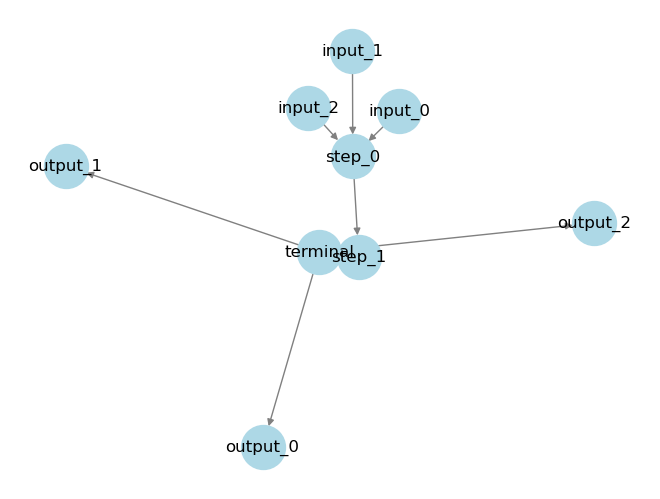

In [24]:
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray',
        node_size=1000, arrows=True)
plt.show()